# 실습: 기상청 공공데이터분석 

## 1.데이터 준비하기

###  공공데이터 수집

- 기상청 사이트에서 날씨 데이터를 다운로드한다.
- 사이트에 가입하고 로그인해야 다운로드할 수 있다.
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
- csv파일 다운로드해서 사용
- OBS_ASOS_MNH_~.csv 파일 이름을 'weather_data.csv'로 변경해서 사용하기


---------

## 2.데이터 전처리(가공하기)

#### 1. 다운로드된 데이터 불러오기 

In [49]:
import pandas as pd

# OBS_ASOS_MNH_~.csv 파일명 데이터를 'weather_data.csv'로 변경하기 
#file = 'C:/python/projectmanager/data/weather_data.csv' 
file = 'data/weather_data.csv' 
df = pd.read_csv(file, encoding='CP949')
print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8


#### # 데이터 요약

In [50]:
# 데이터 요약 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54435 entries, 0 to 54434
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  54435 non-null  int64  
 1   지점명                 54435 non-null  object 
 2   일시                  54435 non-null  object 
 3   평균기온(°C)            53807 non-null  float64
 4   최고기온(°C)            54237 non-null  float64
 5   최저기온(°C)            54212 non-null  float64
 6   평균현지기압(hPa)         51997 non-null  float64
 7   평균상대습도(%)           53241 non-null  float64
 8   월합강수량(00~24h만)(mm)  54150 non-null  float64
 9   평균풍속(m/s)           53282 non-null  float64
 10  합계 일조시간(hr)         53055 non-null  float64
 11  최심적설(cm)            11895 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.0+ MB


#### # 기술통계 정보

In [51]:
df.describe()

,지점,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
count,54435.000000,53807.000000,54237.000000,54212.000000,51997.000000,53241.000000,54150.000000,53282.000000,53055.000000,11895.000000
mean,186.670341,12.628870,24.317525,2.028092,1005.837291,69.885971,110.341457,2.331489,188.699729,8.191148
std,62.081035,9.152594,8.020697,10.765021,16.180945,9.838686,120.815806,1.294391,46.280604,14.853678
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,133.000000,4.600000,17.900000,-6.500000,1001.200000,63.000000,30.700000,1.400000,158.700000,1.500000
50%,170.000000,13.200000,25.800000,1.300000,1008.600000,71.000000,68.100000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,77.000000,145.900000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


#### # 결측데이터 시각화
missingno패키지는 pandas 데이터프레임 데이터에서 누락된 데이터를 찾고 시각화하는 기능 제공

In [52]:
!pip install missingno


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


- **행에 결측 데이터 시각화**

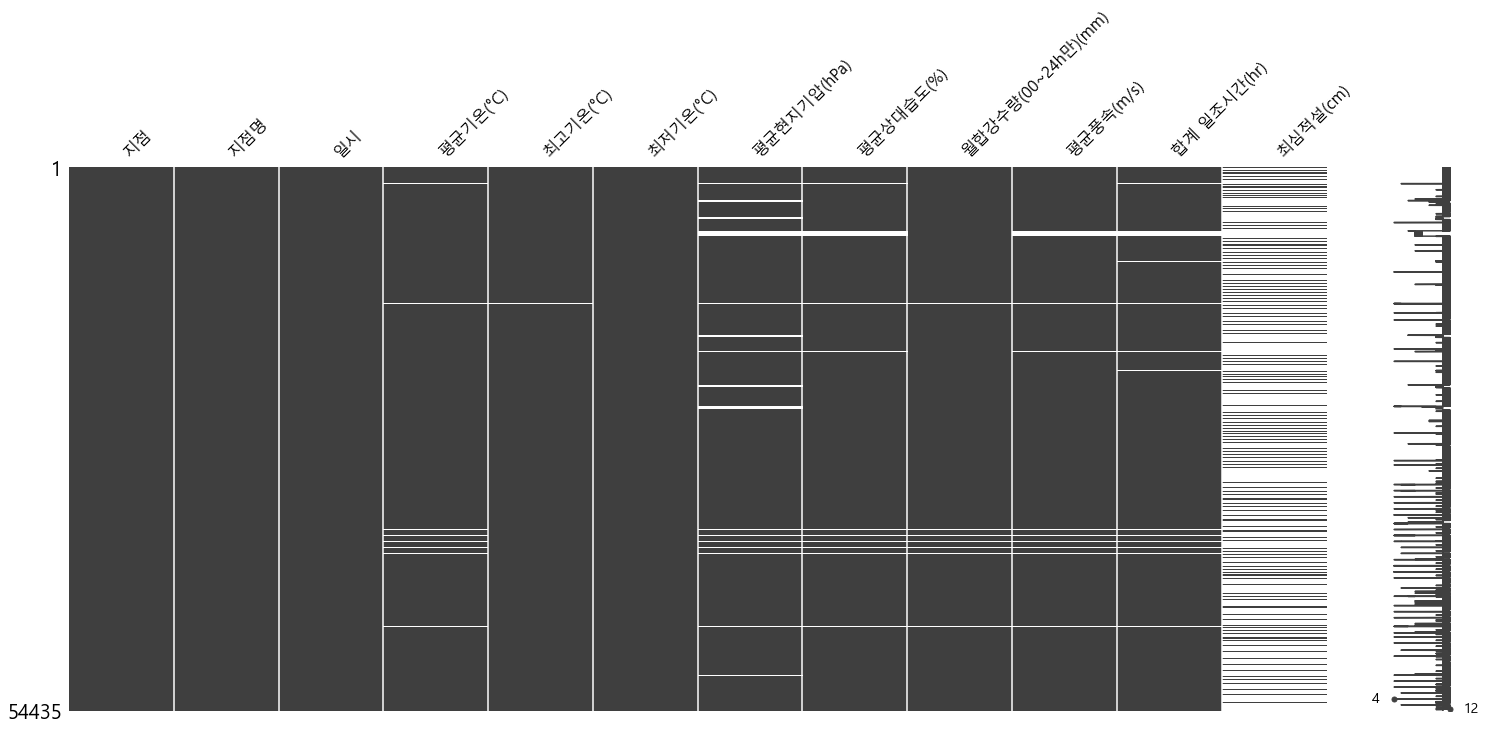

In [53]:
import missingno as msno
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

msno.matrix(df)
plt.show()

- **열에 결측 데이터 시각화**

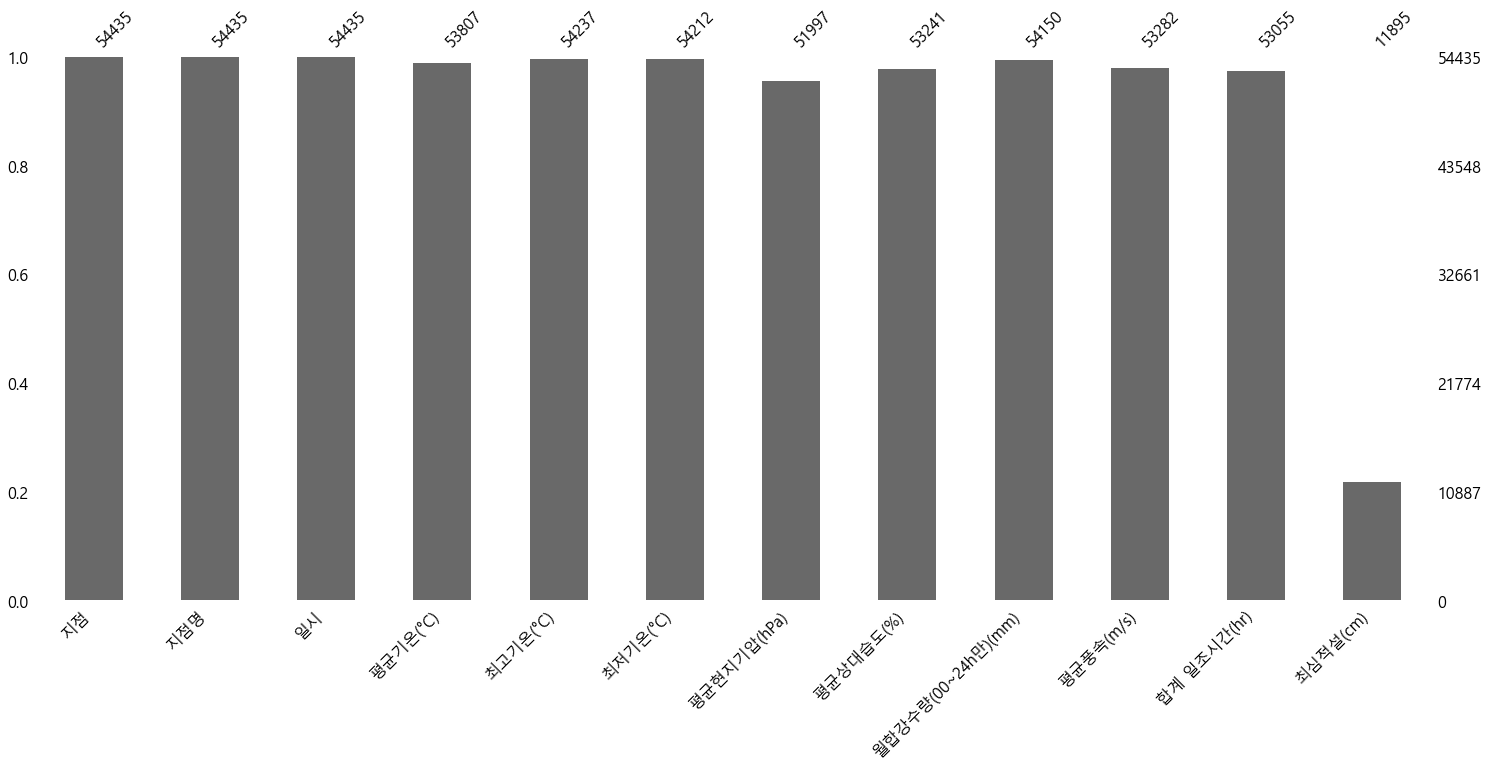

In [54]:
msno.bar(df)
plt.show()

#### 2. 컬럼명 변경하기

In [55]:
df.columns
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온', '평균현지기압',
       '평균상대습도', '월합강수량', '평균풍속','일조시간', '최심적설']
df.head(3)

,지점,지점명,일시,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03-01,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0


#### 3. 컬럼 추가하기
DataFrame.insert(추가하고싶은위치,컬럼명,값, allow_duplicate=False)

In [56]:
df.insert(3,'신규',df['지점'])
df

,지점,지점명,일시,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01-01,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03-01,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04-01,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05-01,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54430,295,남해,2021-08-01,295,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN
54431,295,남해,2021-09-01,295,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN
54432,295,남해,2021-10-01,295,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN
54433,295,남해,2021-11-01,295,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN


In [57]:
# 년월 추가
df.insert(3,'년도',df['일시'].str[0:4])
df

,지점,지점명,일시,년도,신규,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01-01,1968,90,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,1968,90,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03-01,1968,90,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04-01,1968,90,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05-01,1968,90,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54430,295,남해,2021-08-01,2021,295,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN
54431,295,남해,2021-09-01,2021,295,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN
54432,295,남해,2021-10-01,2021,295,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN
54433,295,남해,2021-11-01,2021,295,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN


#### 4. 컬럼 삭제

In [58]:
df.drop('신규', axis=1, inplace=True)
df

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02-01,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03-01,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04-01,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05-01,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54430,295,남해,2021-08-01,2021,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN
54431,295,남해,2021-09-01,2021,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN
54432,295,남해,2021-10-01,2021,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN
54433,295,남해,2021-11-01,2021,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN


#### 5. 특정 조건 검색

In [59]:
print( len( set(df['지점명']) ) )
print( set( df['지점명'] ) )

102
{'금산', '영주', '안동', '고창군', '태백', '목포', '영천', '서울', '전주', '동두천', '부안', '합천', '제주', '이천', '정선군', '북춘천', '청송군', '고산', '삼척', '홍천', '북강릉', '남원', '무안', '김해시', '정읍', '천안', '성산', '보은', '영덕', '의성', '의령군', '홍성', '경주시', '춘천', '대구', '장수', '성산포', '거창', '인천', '진도군', '고흥', '청주', '통영', '백령도', '구미', '동해', '광양시', '충주', '서산', '서귀포', '남해', '밀양', '포항', '철원', '속초', '영광군', '거제', '진도(첨찰산)', '대관령', '해남', '인제', '흑산도', '주암', '울진', '장흥', '군산', '함양군', '순창군', '부산', '대구(기)', '보성군', '순천', '원주', '창원', '임실', '완도', '세종', '울릉도', '수원', '영월', '북창원', '관악산', '강릉', '문경', '양산시', '부여', '산청', '보령', '강화', '봉화', '상주', '강진군', '고창', '광주', '진주', '파주', '울산', '추풍령', '대전', '여수', '양평', '제천'}


- **특정 컬럼명 검색** : 지점명=='제주' 데이터

In [60]:
df[df.지점명 == '제주' ]

df.query(" 지점명 == '제주' ")  


df.iloc[ df.index[ df['지점명'] == '제주' ] ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
27788,184,제주,1923-05-01,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
27789,184,제주,1923-06-01,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
27790,184,제주,1923-07-01,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
27791,184,제주,1923-08-01,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
27792,184,제주,1923-09-01,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28967,184,제주,2021-08-01,2021,27.3,33.8,22.2,1006.0,79.0,227.8,2.5,170.5,NaN
28968,184,제주,2021-09-01,2021,24.9,33.3,19.0,1010.0,84.0,493.1,3.4,129.3,NaN
28969,184,제주,2021-10-01,2021,20.1,31.8,9.0,1018.4,73.0,32.1,2.9,193.9,NaN
28970,184,제주,2021-11-01,2021,14.0,23.2,7.0,1018.4,66.0,63.8,3.7,151.2,NaN


- **또는(|) , 포함(in)** 조건 사용: 강릉 또는 속초 데이터 추출

In [61]:
# 또는(|) 사용
df.query(" 지점명=='제주' | 지점명=='서귀포' ").head()

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
27788,184,제주,1923-05-01,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
27789,184,제주,1923-06-01,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
27790,184,제주,1923-07-01,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
27791,184,제주,1923-08-01,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
27792,184,제주,1923-09-01,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN


- **그리고(&)** 조건 사용

In [62]:
df[ (df.지점명 == '제주' ) & (df.최고기온 >10) ]

df.query(" 지점명=='제주' & 최고기온 > 10 ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
27788,184,제주,1923-05-01,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
27789,184,제주,1923-06-01,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
27790,184,제주,1923-07-01,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
27791,184,제주,1923-08-01,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
27792,184,제주,1923-09-01,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28967,184,제주,2021-08-01,2021,27.3,33.8,22.2,1006.0,79.0,227.8,2.5,170.5,NaN
28968,184,제주,2021-09-01,2021,24.9,33.3,19.0,1010.0,84.0,493.1,3.4,129.3,NaN
28969,184,제주,2021-10-01,2021,20.1,31.8,9.0,1018.4,73.0,32.1,2.9,193.9,NaN
28970,184,제주,2021-11-01,2021,14.0,23.2,7.0,1018.4,66.0,63.8,3.7,151.2,NaN


### [실습문제] 측관측 지점이 제주도인 데이터 검색

In [63]:
# 포함(in) 사용
df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ") 

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
27788,184,제주,1923-05-01,1923,16.5,27.0,8.3,NaN,82.0,70.7,5.2,200.4,NaN
27789,184,제주,1923-06-01,1923,19.7,31.2,10.4,NaN,82.0,385.3,5.1,227.3,NaN
27790,184,제주,1923-07-01,1923,23.6,33.0,17.1,NaN,86.0,359.5,5.9,218.8,NaN
27791,184,제주,1923-08-01,1923,26.7,34.6,20.2,NaN,77.0,92.2,6.6,301.7,NaN
27792,184,제주,1923-09-01,1923,22.1,30.4,13.4,NaN,78.0,145.0,7.0,224.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,265,성산포,2006-11-01,2006,14.3,24.1,4.9,1016.6,68.0,85.5,3.8,141.5,NaN
46401,265,성산포,2006-12-01,2006,8.5,17.3,0.2,1023.0,69.0,90.5,3.0,115.1,0.3
46402,265,성산포,2007-01-01,2007,6.9,14.6,0.6,1023.0,66.0,46.3,3.3,109.2,1.7
46403,265,성산포,2007-02-01,2007,9.1,17.7,0.5,1018.0,67.0,60.7,3.7,164.2,2.8


- **min()** : 최초 측정월, 마지막 측정월

In [64]:
# 측정월 최소, 최대 
print ( min(df['일시']) )
print ( df['일시'].min() )
print ( max(df['일시']) )
print ( df['일시'].max() )

# 측정 최초월('1904-04')의 데이터
df['일시'].min()
df.query(" 일시 == '1904-04-01'")

df.query(f" 일시 == '{ df['일시'].min() }' ")

df[ df['일시'] == df['일시'].min() ]

1904-04-01
1904-04-01
2021-12-01
2021-12-01


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
6369,112,인천,1904-04-01,1904,NaN,19.2,6.4,NaN,NaN,104.9,NaN,NaN,NaN
21791,159,부산,1904-04-01,1904,NaN,21.4,4.7,NaN,NaN,172.9,NaN,NaN,NaN
23944,165,목포,1904-04-01,1904,NaN,20.2,NaN,NaN,NaN,34.7,NaN,NaN,NaN


- **max()** : 최근 측정 월 검색

In [65]:
df.query(f" 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
647,90,속초,2021-12-01,2021,2.8,13.9,-14.9,1019.6,47.0,68.7,2.2,219.8,NaN
710,93,북춘천,2021-12-01,2021,-2.2,11.4,-17.2,1013.4,72.0,5.2,1.1,173.8,6.4
1118,95,철원,2021-12-01,2021,-2.1,11.1,-18.0,1006.2,76.0,4.9,1.1,177.3,NaN
1406,98,동두천,2021-12-01,2021,-1.1,12.8,-17.3,1011.1,66.0,8.3,1.4,185.1,NaN
1646,99,파주,2021-12-01,2021,-1.9,12.3,-18.7,1022.4,71.0,5.8,1.2,193.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52053,285,합천,2021-12-01,2021,2.4,15.6,-11.0,1020.6,62.0,1.2,0.9,184.9,NaN
52642,288,밀양,2021-12-01,2021,2.8,15.4,-9.3,1022.6,58.0,3.0,1.2,202.8,NaN
53238,289,산청,2021-12-01,2021,2.1,14.8,-10.7,1007.9,62.0,1.7,2.7,154.8,NaN
53835,294,거제,2021-12-01,2021,5.3,16.4,-6.6,1018.8,59.0,5.0,1.4,181.3,NaN


In [66]:
df.query(f" 지점명 == '제주' & 일시 == '{ df['일시'].max() }' ")

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28971,184,제주,2021-12-01,2021,8.9,17.4,-0.5,1023.2,67.0,31.4,4.2,85.9,4.4


### [실습]: 가장 더웠던 날짜와 온도는?
- 기상관측 데이터에서 가장 더웠던(추웠던) 해와 기온은?

In [67]:
# 컬럼 추출
df['최고기온'].max()
df.최고기온.max()


# 행 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ")
df[ df.최고기온 == df.최고기온.max() ]

,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
34762,212,홍천,2018-08-01,2018,27.2,41.0,15.8,991.7,73.0,300.6,1.4,234.4,NaN


In [68]:
# 행 추출 특정 컬럼값(year) 추출
print(f'기상관측 데이터를 통해 가장 더웠던 년도는?')
print(df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:4] )


yymm = df.query(f" 최고기온 == {  df.최고기온.max()  } ").일시.str[0:7]
yymm = df[ df.최고기온 == df.최고기온.max() ].일시.str[0:7]
print(f'기상관측 데이터를 통해 가장 더웠던 년-월: {yymm}')


# 행 추출 특정 컬럼값(최고기온) 추출
df.query(f" 최고기온 == {  df.최고기온.max()  } ").최고기온
df[ df.최고기온 == df.최고기온.max() ].최고기온

기상관측 데이터를 통해 가장 더웠던 년도는?
34762    2018
Name: 일시, dtype: object
기상관측 데이터를 통해 가장 더웠던 년-월: 34762    2018-08
Name: 일시, dtype: object


34762    41.0
Name: 최고기온, dtype: float64

In [69]:
# 전체 최고기온
df.query(f" 최고기온 == {df['최고기온'].max()} ")

# 전체 최고기온 일시
df.query(f" 최고기온 == {df['최고기온'].max()} ")['일시'].str[0:4]

# 전체 최고기온 지점명
df.query(f" 최고기온 == {df['최고기온'].max()} ")['지점명']

# # 측정 지점이 제주인  최고기온
df.query(f" 지점명=='제주' ")['최고기온'].max()


# 측정 지점이 제주 전역의   최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()

37.5

### [실습]: 가장 추웠던 날짜와 온도는?

In [70]:
field = '최저기온'

# 전체 최저기온
df.query(f" {field} <= { df[field].min() } ")

# 전체 최저기온 일시
df.query(f" {field} <= { df[field].min() } ")['일시'].str[0:4]

# 전체 최저기온 지점명
df.query(f" {field} <= { df[field].min() } ")['지점명']

# 측정 지점이 제주인 최저기온
df.query(f" 지점명=='제주' ")[field].min()

# 측정 지점이 제주 전역의  최고기온
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min()

-7.0

###  [실습] : '제주'에서 가장 더웠던 날짜와 기온?

In [71]:
wmax = df.query(" 지점명 == '제주' ")['최고기온'].max()
print(wmax)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최고기온 >= { wmax }")


wmax = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최고기온'].max()
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최고기온 >= { wmax }")

37.5


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
28018,184,제주,1942-07-01,1942,27.0,37.5,17.8,1008.8,78.0,15.5,3.0,347.2,NaN


###  [실습] : '제주'에서 가장 추웠던 날짜와 기온은?

In [72]:
wmin = df.query(" 지점명 == '제주' ")['최저기온'].min() 
print(wmin)
# 해당 레코드
df.query(f" 지점명 == '제주' and 최저기온 <= { wmin  } ")

wmin = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")['최저기온'].min() 
df.query(f" 지점명 in ('고산','서귀포','성산','성산포','제주') and 최저기온 <= { wmin  } ")

-6.0


,지점,지점명,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
29588,187,성산,1990-01-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
30023,188,성산,1990-01-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6
46198,265,성산포,1990-01-01,1990,4.3,17.7,-7.0,1017.4,72.0,118.3,3.1,99.1,7.6


--------

### 그룹핑(Grouping)

#### #그룹핑: 지점별  

In [73]:
df.groupby(['지점명'], as_index=False).mean()
df.groupby('지점명').mean()

,지점,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,
강릉,105.0,12.551719,24.977913,2.261995,1013.760566,64.095420,112.119131,2.919847,190.108672,17.191809
강진군,259.0,13.688194,24.944521,3.445890,1015.421528,71.937500,119.152055,2.417931,184.370548,7.450000
강화,201.0,11.123810,22.437521,0.131993,1012.365986,70.301020,107.645813,1.738095,203.184812,4.911034
거제,294.0,14.186565,24.367114,4.575839,1013.037585,66.811224,155.911092,1.792687,197.441468,3.147727
거창,284.0,11.765476,25.072027,-0.346231,989.892794,70.064626,106.362395,1.339116,199.919283,5.467901
...,...,...,...,...,...,...,...,...,...,...
합천,285.0,13.025680,26.040986,1.271939,1012.804770,68.022109,107.293186,1.216014,195.761263,3.942857
해남,261.0,13.407993,24.497351,2.577649,1013.453571,74.362245,109.593950,2.107496,194.226451,4.406107
홍성,177.0,12.627027,24.409459,1.475676,1013.752703,75.824324,95.486486,1.505405,202.408108,4.771429


In [74]:
df.groupby(['지점명'], as_index=False).count()

,지점명,지점,일시,년도,평균기온,최고기온,최저기온,평균현지기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,강릉,1313,1313,1313,1309,1313,1313,1131,1310,1312,1310,1303,293
1,강진군,146,146,146,144,146,146,144,144,146,145,146,14
2,강화,609,609,609,588,597,597,588,588,609,588,586,145
3,거제,597,597,597,588,596,596,588,588,586,588,586,44
4,거창,598,598,598,588,597,597,569,588,593,588,586,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,합천,591,591,591,588,588,588,587,588,587,587,586,91
98,해남,606,606,606,588,604,604,588,588,595,587,586,131
99,홍성,74,74,74,74,74,74,74,74,74,74,74,14
100,홍천,606,606,606,588,596,596,588,588,606,587,586,157


#### #그룹핑(컬럼1개): 지점별  평균기온 

In [75]:
# 방법1
df['평균기온'].groupby(df['지점명']).mean()

지점명
강릉     12.551719
강진군    13.688194
강화     11.123810
거제     14.186565
거창     11.765476
         ...    
합천     13.025680
해남     13.407993
홍성     12.627027
홍천     10.532653
흑산도    13.564000
Name: 평균기온, Length: 102, dtype: float64

In [76]:
# 방법2
df.groupby('지점명')['평균기온'].agg('mean')

지점명
강릉     12.551719
강진군    13.688194
강화     11.123810
거제     14.186565
거창     11.765476
         ...    
합천     13.025680
해남     13.407993
홍성     12.627027
홍천     10.532653
흑산도    13.564000
Name: 평균기온, Length: 102, dtype: float64

In [77]:
# 방법3
df.groupby('지점명')['평균기온'].agg(**{'평균기온':'mean'})

,평균기온
지점명,
강릉,12.551719
강진군,13.688194
강화,11.123810
거제,14.186565
거창,11.765476
...,...
합천,13.025680
해남,13.407993
홍성,12.627027


In [78]:
# 방법4
df.groupby('지점명').aggregate({'평균기온':'mean'})

,평균기온
지점명,
강릉,12.551719
강진군,13.688194
강화,11.123810
거제,14.186565
거창,11.765476
...,...
합천,13.025680
해남,13.407993
홍성,12.627027


#### #그룹핑(컬럼 2개): 지점명+년도별,  평균기온

In [79]:
df.groupby(['지점명','년도'])['평균기온'].agg('mean')
df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균':'mean'})
df.groupby(['지점명','년도']).aggregate({'평균기온':'mean'})
#df.groupby(['지점명','년도'])['평균기온'].agg(**{'평균기온':'mean'}).reset_index()

평균기온
지점명 년도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2017  13.491667
    2018  13.825000
    2019  14.066667
    2020  14.100000
    2021  15.258333

[4560 rows x 1 columns]

### [실습문제] : 지점별 최고기온?

In [80]:
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
#df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})

df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'})
df.groupby('지점명').aggregate({'최고기온':'max'})

,최고기온
지점명,
강릉,39.4
강진군,37.4
강화,35.8
거제,38.6
거창,37.8
...,...
합천,39.5
해남,37.2
홍성,37.0


- 인텍스를 초기화 하는 방법

In [81]:
# 인텍스를 초기화 하는 방법
df.groupby('지점명')['최고기온'].agg(**{'최고기온':'max'}).reset_index()
df.groupby('지점명').aggregate({'최고기온':'max'}).reset_index()

,지점명,최고기온
0,강릉,39.4
1,강진군,37.4
2,강화,35.8
3,거제,38.6
4,거창,37.8
...,...,...
97,합천,39.5
98,해남,37.2
99,홍성,37.0
100,홍천,41.0


### [실습문제] : 지점별 년도별 최다 월합강수량?

In [82]:
df.groupby(['지점명','년도'])['월합강수량'].agg(**{'최다월합강수량':'max'})
df.groupby(['지점명','년도']).aggregate({'월합강수량':'max'})

월합강수량
지점명 년도         
강릉  1911   36.5
    1912  346.1
    1913  232.5
    1914  383.4
    1915  302.3
...         ...
흑산도 2017  262.9
    2018  244.3
    2019  201.7
    2020  305.2
    2021  176.0

[4560 rows x 1 columns]

### [실습문제]  제주 전역의 지점별+년도별 최고 최고기온, 최저 최저기온 ,최다 월합강수량, 최다 최심적실은?

In [83]:
df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'최고기온':'max',
                                          '최저기온':'min',
                                          '월합강수량':'max',
                                          '최심적설':'max'})

df2.to_csv('data/제주년도별날씨정보.csv', encoding='cp949')
df2

최고기온  최저기온  월합강수량  최심적설
지점명 년도                           
고산  1988  30.5  -2.1  207.4   0.5
    1989  30.5  -1.0  273.2   0.3
    1990  32.4  -3.5  205.8   2.7
    1991  31.4  -3.0  368.2   1.0
    1992  31.7   0.2  326.6   NaN
...        ...   ...    ...   ...
제주  2017  37.0  -1.1  162.0   2.8
    2018  35.3  -2.6  376.5  14.4
    2019  35.4   1.0  610.6   NaN
    2020  36.3  -1.4  400.5   2.1
    2021  34.2  -3.1  493.1   9.2

[282 rows x 4 columns]

### # DataFrame 구조 변경하기: pivot()
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html
- DataFrame.**pivot**(index=None, columns=None, values=None)

In [84]:
df_t = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df_t

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [85]:
df_t.pivot(index='foo', columns='bar', values='baz')
df_t.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [86]:
df_t.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
df_t.pivot(index='foo', columns='bar')[['baz', 'zoo']]


baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

### # DataFrame에서 한 행씩 불러오기
!!![주의]!!! 데이터가 많을 경우 실행하지 않도록

In [87]:
# # 한 행씩 불러오기  ---->
# for i, row in df_t.iterrows():
#     print(i, row)
#     print(i, row['지점명'], row['최고기온'])

#### 6.가공된 파일 신규 저장하기

In [88]:
# 가공된 데이터 신규 파일로 저장하기 
file = 'data/weather_data2.csv' 
df.to_csv(file, encoding='cp949', mode='w', index=True)

--------------------------

## 3. 데이터 시각화하기

### [실습] : 지점별 평균기온 그래프

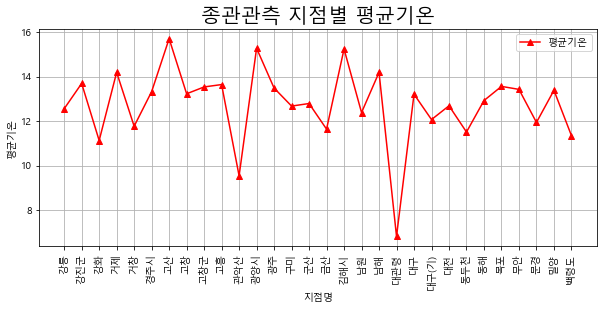

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'data/weather_data.csv'
df = pd.read_csv(file, encoding='CP949')

# 2.컬럼명 지정
df.columns = ['지점', '지점명', '일시', '평균기온', '최고기온', '최저기온',
              '평균현지기압','평균상대습도', '월합강수량', '평균풍',
              '일조시간','최심적설']
df['년도'] = df.일시.str[0:4] 
df.head(2)

# 3.지점별 평균 구하기(지점 30개만 추출)
df_ = df.groupby('지점명').aggregate({'평균기온':'mean'}).head(30)

plt.plot(df_, '^', linestyle='solid', c='r', label='평균기온')
plt.xticks(rotation=90)
plt.title('종관관측 지점별 평균기온', fontsize=20)
plt.xlabel('지점명'); plt.ylabel('평균기온');
plt.legend(); plt.grid(); 
plt.show()

### [실습문제] : '제주' 지점의 년도별 평균기온을  선 그래프로 나타내기

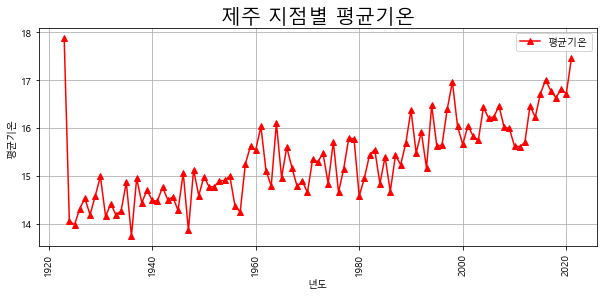

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.unicode_minus']

# 1.데이터 불러오기
file = 'data/weather_data2.csv'
df = pd.read_csv(file, encoding='CP949')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df


# 2,지점별 연도별 그룹핑하기
df2 = df.query(" 지점명 == '제주' ")
# df2 = df.query(" 지점명 in ('고산','서귀포','성산','성산포','제주') ")
df2 = df2.groupby(['지점명','년도']).aggregate({'평균기온':'mean'}).reset_index()

X = df2.년도
Y = df2.평균기온

# 3.지점별 평균 구하기(지점 30개만 추출)
plt.plot(X, Y, '^', linestyle='solid', c='r', label='평균기온')
plt.title('제주 지점별 평균기온', fontsize=20)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### [실습]: 제주의 평균기온, 최고기온, 최저기온 통계를 그래프로 나타내기

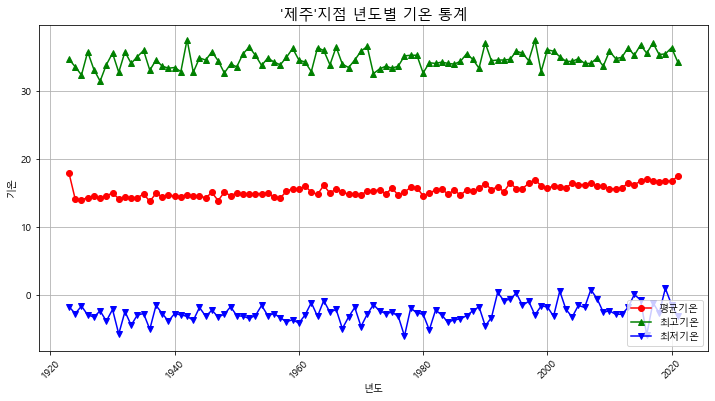

In [91]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False 

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도').평균기온.agg(**{'평균기온':'mean'})
data2 = data.groupby('년도').최고기온.agg(**{'최고기온':'max'})
data3 = data.groupby('년도').최저기온.agg(**{'최저기온':'min'})

# 3. 그래프로 시각화하기 
plt.plot(data1, 'o', linestyle='solid', c='r', label='평균기온') 
plt.plot(data2, '^', linestyle='solid', c='g', label='최고기온')
plt.plot(data3, 'v', linestyle='solid', c='b', label='최저기온')
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')     # x축 레이블
plt.ylabel('기온')     # y축 레이블             
plt.legend()           #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기
plt.grid()               # 격자 표시

plt.show()


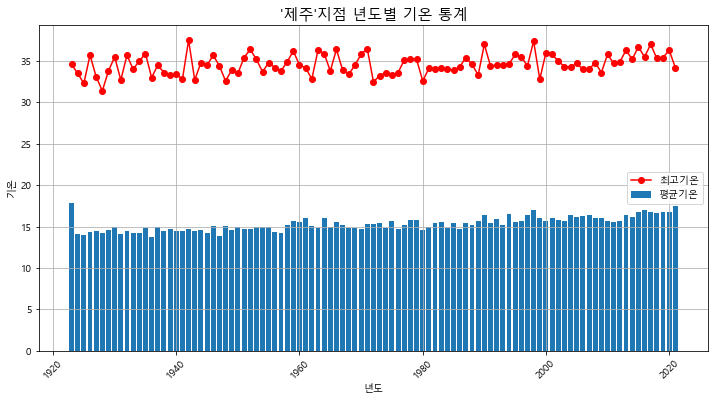

In [92]:
# 2. '제주'지점 년도별 기온 데이터 추출하기(년도 30개만)
plt.rcParams['axes.unicode_minus'] = False 

data = df.query(" 지점명 == '제주' ")
data1 = data.groupby('년도')['평균기온'].agg(**{'평균기온':'mean'}).reset_index()
data2 = data.groupby('년도')['최고기온'].agg(**{'최고기온':'max'}).reset_index()

# 3. 그래프로 시각화하기 
X = data1['년도']
Y1 = data1['평균기온']
Y2 = data2['최고기온']
plt.bar(X, Y1, label='평균기온')
plt.plot(X, Y2, 'o', linestyle='solid', c='r', label='최고기온') 
plt.title("'제주'지점 년도별 기온 통계", fontsize=15) #제목
plt.xlabel('년도')        # x축 레이블
plt.ylabel('기온')        # y축 레이블             
plt.legend()             #범례,기본 위치 : loc='upper left'
plt.xticks(rotation=45)  # x축 레이블 기울이기

plt.grid()               # 격자 표시

plt.show()

### [실습]: 제주의 최고기온(선그래프),평균기온(막대그래프)을 혼합 그래프로 나타내기

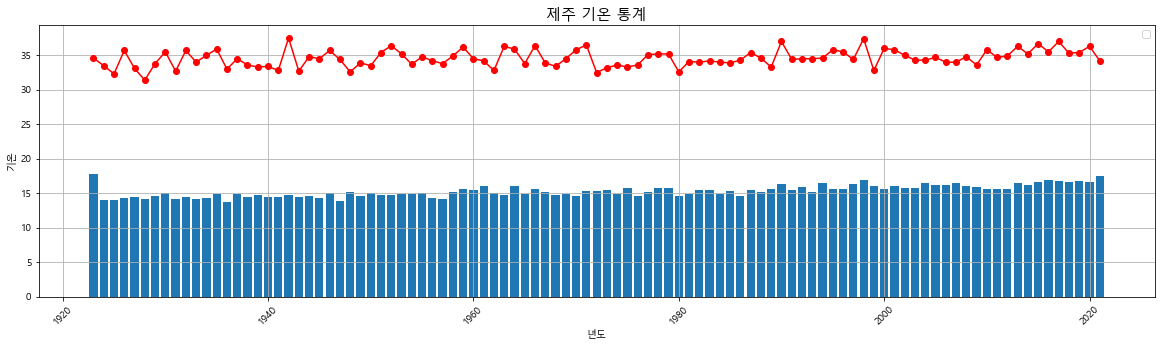

In [93]:
# 3. 그래프로 시각화하기 
plt.figure(figsize=(20,5))
plt.title('제주 기온 통계', fontsize=15)         #제목
plt.legend(['최고기온','평균기온']) #범례,기본 위치 : loc='upper left'
plt.xlabel('년도')                 # x축 레이블
plt.ylabel('기온')                 # y축 레이블  
plt.xticks(rotation=45)           # x축 레이블 기울이기
plt.grid()                        # 격자 표시

plt.bar(X, Y1)  # 막대 그래프
plt.plot(X, Y2, 'o', linestyle='solid', c='r')  # 선그래프
plt.show()


### [실습] : 2중 축 그래프 그리기 :  평균상대습도 & 월합강수량 

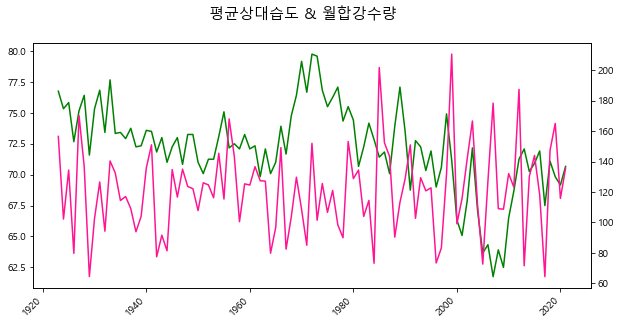

In [94]:
# 2.'제주'지점의 평균상대습도 & 일최다강수량 센터수
data = df.groupby(['지점명','년도'])['평균상대습도'].agg(**{'평균상대습도':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
X  = data['년도']
Y1 = data['평균상대습도']

data = df.groupby(['지점명','년도'])['월합강수량'].agg(**{'월합강수량':'mean'}).reset_index()
data = data.query(" 지점명 == '제주' ")
Y2 = data['월합강수량']
# print(Y2)


# 3. 그래프로 시각화하기 
plt.rcParams['figure.figsize'] = (10, 5)   # 그래프 크기

fig, ax1 = plt.subplots()        
plt.suptitle('평균상대습도 & 월합강수량',fontsize=15)
ax1.plot(X, Y1, color='green')     # 평균상대습도 (왼쪽)
ax2 = ax1.twinx()
ax2.plot(X, Y2, color='deeppink')  # 월합강수량 (오른쪽)

fig.autofmt_xdate(rotation=45)  #X축 레이블 기울이기

plt.show()

-------

---------

끝!